# H14

In [2]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [4]:
#RL
import gym
from gym.envs.registration import register
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
import pylab
import random
import numpy as np
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
#from tqdm import tqdm
from copy import deepcopy
import numpy.linalg as LA

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import math

Using TensorFlow backend.


## Reinforcement Learning 

In this assignment we are going to work with OpenAIgym's FrozenLake environment. The details of the environment can be found in the link https://gym.openai.com/envs/FrozenLake-v0/. 


Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. 

The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

The surface is described using a grid like the following:
[PP: WOULD IT BETTER TO INCLUDE A DIAGRAM]

- S: starting point, safe
- F: frozen surface, safe
- H: hole, fall to your doom
- G: goal, where the frisbee is located

SFFF  <br> 
FHFH <br> 
FFFH  <br> 
HFFG <br> 

Expected actions are Left(0), Down(1), Right(2), Up(3). 

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.


In [35]:
import gym
from gym.envs.registration import register
register(id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196, # optimum = .8196
)

In [36]:
from gym.envs.registration import register
register(
    id='FrozenLake8x8NotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '8x8', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196, # optimum = .8196
)

*hint:* If you receive an error message while registering the above env the second time you run this cell again, ignore the error message or restart the kernel. 

Throughout the assignment, use only the environments we registered in the previous cells:
- `FrozenLake8x8NotSlippery-v0`
- `FrozenLakeNotSlippery-v0` 

Even though the original problem description has slippery environment, we are working in a non-slippery environment. In our environment, if you go right, you only go right whereas in the original environment, if you intend to go right, you can go right, up or down with 1/3 probability.



We will look at demo code on how to work with the environment - extremely straightforward. Here we are going to work with a random choice of action just to show you how to sample transitions from the environment. 

In [37]:
import gym
import numpy as np

# Change environment to FrozenLake8x8 to see grid.
env = gym.make('FrozenLakeNotSlippery-v0')
# env = gym.make('FrozenLake8x8NotSlippery-v0')

print(env.observation_space.n)

# Both the grids look like as follows.
'''
    "4x4": [
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
    ],
    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG"
    ]'''

# env.render() prints the frozenlake with an indicator showing where the agent is. You can use it for debugging.
env.render()

16

SFFF
FHFH
FFFH
HFFG


In [38]:
Q = np.zeros([env.observation_space.n,env.action_space.n])

def choose_action(state):
    return np.random.choice(np.array([0,1,2,3]))

def learn(s, s1, r, a):
    return

In [39]:
# Set learning parameters
################

# num_episodes = 2000
# epsilon = 0.0
# max_steps = 100
# lr_rate = 0.0
# gamma = 0.0
# rList = []

num_episodes = 1
max_iter_per_episode = 20
for i in range(num_episodes):
    iter = 0
            
    # Reset environment and get an initial state - should be done at start of each episode.
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    while iter < max_iter_per_episode:
        iter += 1
        
        # Choose an action
        a = choose_action(s)
        
        # env.step() gives you next state, reward, done (whether the episode is over)
        # s1 - new state, r-reward, d-whether you are done or not
        s1, r, d, _ = env.step(a)
        print('State :', s, ' Action :', a, ' State 1 :', s1, ' Reward :', r, 'Done :', d)
        
        learn(s, s1, r, a)
        
        if d:
            print('Episode Over')
            if r != 1:
                print('Fell into hole with reward', r)            
            break
            
        s = s1
        
    if r==1:
        print(i)
        break

State : 0  Action : 0  State 1 : 0  Reward : 0.0 Done : False
State : 0  Action : 0  State 1 : 0  Reward : 0.0 Done : False
State : 0  Action : 2  State 1 : 1  Reward : 0.0 Done : False
State : 1  Action : 1  State 1 : 5  Reward : 0.0 Done : True
Episode Over
Fell into hole with reward 0.0


**3.1 Define the MDP [8 pts]**

1. Define the MDP using the information from the link provided for FrozenLake environment. Use standard notations wherever possible. Defining the MDP usually means that you formally define your state space, action space and reward space, the absorbing states and discounts.

2. Also justify why this problem is a MDP (i.e. justify the state representation and its corresponding Markovianity). 


In [40]:
# State space: 4 x 4 grid
S = list(range(env.nS))
print("State space: " + str(S))

State space: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [41]:
# Action space: Left(0), Down(1), Right(2), Up(3)
A = list(range(4))
print("Action space: " + str(A))

Action space: [0, 1, 2, 3]


In [42]:
# Reward space: 1 for reaching the goal and 0 otherwise.
R = [0, 1]
print("Reward space: " + str(R))

Reward space: [0, 1]


In [43]:
# Absorbing states: 5, 7, 11, 12 states for holes, and 15 for goal
AS = [5, 7, 11, 12, 15]
print("Absorbing states: " + str(AS))

Absorbing states: [5, 7, 11, 12, 15]


In [44]:
# Discount: 
# Since the agent only achieves a non-zero reward when it reaches the goal and it can only reach the goal once, 
# the return quantity is always the same and should therefore be unaffected by γ. Thus, most values of gamma are 
# equivalent for this problem, as long as not too close to 0 or 1. 
gamma = 0.9
print("Discount: " + str(gamma))

Discount: 0.9


This problem is a Markov Process, since it fulfils the Markov property - the future system dynamics from any state have to depend on this state only. Every observable state is self-contained to describe the future of the system. Only one state is required to model the future dynamics of the system, not the whole history or, say, the last N states.

This problem has rewards which is 1 of reaching the goal and 0 otherwise, which extends the Markov process to Markov reward process.

This problem has actions of up, down, left and right, which further extends the Markov reward process to Markov decision process (MDP).


**3.2 Value and Policy Iteration [15 pts]**

The aim in this problem is to reach the goal from S to G. Let us assume that we know our transition model (right - one step right, left -one step left, up - one step up, down - one step down. If an action is not possible from a spot, you remain there) In these environments, reaching the goal (G) with fetch us a reward of +1 and terminate the episode. Reaching any Hole (H) would give us 0 reward and terminate the episode.

For both the environments (you can find the states of both the environments in the demo code above on the commented lines), do the following.

1. Write code to perform **value iteration** (starting from zero value assignment) and then, calculate optimal value function and thus calculate the subsequent policy induced by the value function. Show the value function and policy using heat map and arrow marks (to indicate direction) on each of the 4\*4 or 8\*8 grid cells.
2. Write code to perform **policy iteration** (starting from a zero policy) and then calculate the optimal policy. Show the same visualizations. Check if the policy matches in both the cases. Check if the value function matches in both the cases. Justify the results found on this comparison.
3. Can you try two or three different $\gamma$ values and also discuss what the impact of $\gamma$ is on your training.


**3.2.1 Value Iteration **

In [45]:
# Value iteration 
def value_iteration(env, gamma, max_iter_per_episode, tol=1e-3):
    # optimal values and actions
    value_list = np.zeros(env.nS)
    action_list = np.zeros(env.nS)
    
    for iteration in range(max_iter_per_episode):
        delta = 0
        for s in range(env.nS):
            argmax = float("-inf")
            for a in range(env.nA):
                temp = 0
                for (prob, nextstate, reward, is_terminal) in env.P[s][a]:
                    temp += prob * (reward + gamma * value_list[nextstate])

                    if temp > argmax:
                        argmax = temp
                        action_list[s] = a

            delta = max(delta, abs(value_list[s] - argmax))
            value_list[s] = argmax
        
        if delta<=tol: break

    return value_list, action_list, iteration

In [46]:
# value iteration results
values, actions, _ = value_iteration(env, gamma=0.9, max_iter_per_episode=20)
print("Optimal Value by state: " + str(values))
print("Optimal Action by state: " + str(actions))

Optimal Value by state: [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]
Optimal Action by state: [1. 2. 1. 0. 1. 0. 1. 0. 2. 1. 1. 0. 0. 2. 2. 0.]


In [47]:
values = pd.DataFrame(values.reshape(4,4))
actions = pd.DataFrame(actions.reshape(4,4))

mapping = {0: 'left', 1: 'down', 2: 'right', 3: 'up'}
for col in range(4): 
    actions[col] = actions[col].apply(lambda x: mapping[x])

In [48]:
labels = "SFFFFHFHFFFHHFFG"

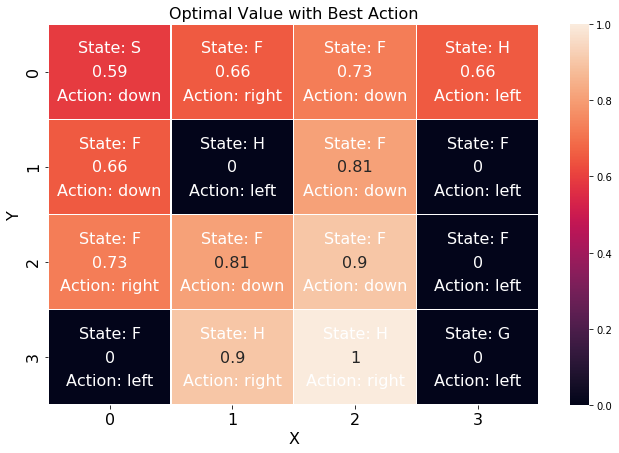

In [49]:
# Plot value iteration results 
f, ax = plt.subplots(figsize=(11, 7))

sns.heatmap(values, annot=True, linewidths=.5, ax=ax, annot_kws={"size": 16})

for x in range(actions.shape[0]):
    for y in range(actions.shape[1]):
        plt.text(x + 0.5, y + 0.25, 'State: %s' % labels[x * actions.shape[0] + y],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=16, 
                 color='white',
                )

        plt.text(x + 0.5, y + 0.75, 'Action: %s' % actions[x][y],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=16, 
                 color='white',
                )

ax.set_ylabel('Y', fontsize=16)
ax.set_xlabel('X', fontsize=16)
ax.set_title('Optimal Value with Best Action', fontsize=16)
ax.tick_params(labelsize=16)

**3.2.2 Policy Iteration **

In [50]:
# Policy iteration
def policy_evaluate(env, gamma, action_list, max_iterations, tol=1e-3):
    value_eva = np.zeros(env.nS)
    for iteration in range(max_iterations):
        delta = 0
        for s in range(env.nS):
            vsa = value_eva[s]
            for (prob, nextstate, reward, is_terminal) in env.P[s][action_list[s]]:
                value_eva[s] = (reward + gamma * value_eva[nextstate])
            delta = max(delta, abs(vsa-value_eva[s]))
        if delta <= tol: break

    return value_eva

def policy_improve(env, gamma, value_list, action_list):
    policy_stable = True

    for s in range(env.nS):
        b = action_list[s]
        max_vsa = -1
        new_action = b

        for a in env.P[s]:
            for (prob, s1, r, is_terminal) in env.P[s][a]:
                temp = r + gamma * value_list[s1]
                
            if temp > max_vsa:
                max_vsa = temp
                new_action = a
                
        action_list[s] = new_action
        if b != new_action:
            policy_stable = False

    return policy_stable, action_list

def policy_iteration(env, gamma, max_iterations, tol=1e-3):
    action_list = np.zeros(env.nS)
    value_list = np.zeros(env.nS)
    policy_stable = False

    for iteration in range(max_iterations):
        value_list = policy_evaluate(env, gamma, action_list, max_iterations, tol)
        policy_stable, action_list = policy_improve(env, gamma, value_list, action_list)
        if policy_stable: break

    return value_list, action_list, iteration

In [51]:
values, actions, _ = policy_iteration(env, gamma=0.9, max_iterations=20)
print("Optimal Value by state: " + str(values))
print("Optimal Action by state: " + str(actions))

Optimal Value by state: [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]
Optimal Action by state: [1. 2. 1. 0. 1. 0. 1. 0. 2. 1. 1. 0. 0. 2. 2. 0.]


In [52]:
values = pd.DataFrame(values.reshape(4,4))
actions = pd.DataFrame(actions.reshape(4,4))

mapping = {0: 'left', 1: 'down', 2: 'right', 3: 'up'}
for col in range(4): 
    actions[col] = actions[col].apply(lambda x: mapping[x])

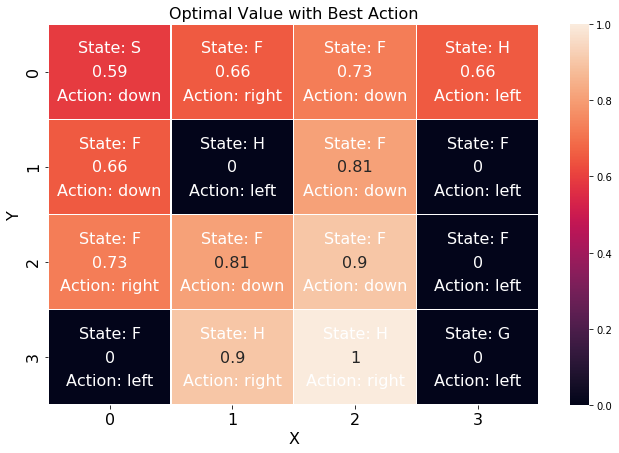

In [53]:
# Plot value iteration results 
f, ax = plt.subplots(figsize=(11, 7))

sns.heatmap(values, annot=True, linewidths=.5, ax=ax, annot_kws={"size": 16})

for x in range(actions.shape[0]):
    for y in range(actions.shape[1]):
        plt.text(x + 0.5, y + 0.25, 'State: %s' % labels[x * actions.shape[0] + y],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=16, 
                 color='white',
                )

        plt.text(x + 0.5, y + 0.75, 'Action: %s' % actions[x][y],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=16, 
                 color='white',
                )

ax.set_ylabel('Y', fontsize=16)
ax.set_xlabel('X', fontsize=16)
ax.set_title('Optimal Value with Best Action', fontsize=16)
ax.tick_params(labelsize=16)

The optimal values from value iterations match perfectly with the optimal values from policy iterations. 

**3.2.3 Gamma impact **

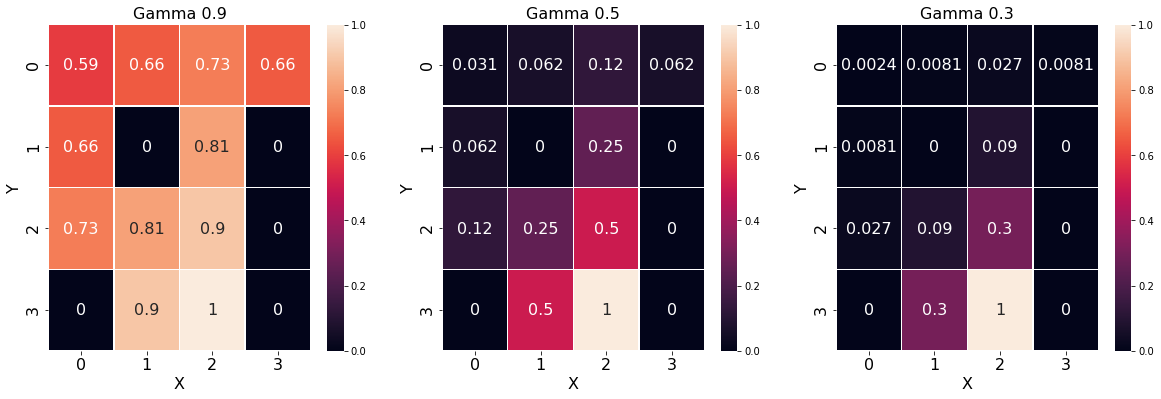

In [54]:
values_9, _, _ = policy_iteration(env, gamma=0.9, max_iterations=20)
values_5, _, _ = policy_iteration(env, gamma=0.5, max_iterations=20)
values_3, _, _ = policy_iteration(env, gamma=0.3, max_iterations=20)

values_9 = pd.DataFrame(values_9.reshape(4,4))
values_5 = pd.DataFrame(values_5.reshape(4,4))
values_3 = pd.DataFrame(values_3.reshape(4,4))

f, ax = plt.subplots(1, 3, figsize=(20, 6))

g1 = sns.heatmap(values_9, annot=True, linewidths=.5, ax=ax[0], annot_kws={"size": 16})
g1.set_ylabel('Y', fontsize=16)
g1.set_xlabel('X', fontsize=16)
g1.set_title('Gamma 0.9', fontsize=16)
g1.tick_params(labelsize=16)

g2 = sns.heatmap(values_5, annot=True, linewidths=.5, ax=ax[1], annot_kws={"size": 16})
g2.set_ylabel('Y', fontsize=16)
g2.set_xlabel('X', fontsize=16)
g2.set_title('Gamma 0.5', fontsize=16)
g2.tick_params(labelsize=16)

g3 = sns.heatmap(values_3, annot=True, linewidths=.5, ax=ax[2], annot_kws={"size": 16})
g3.set_ylabel('Y', fontsize=16)
g3.set_xlabel('X', fontsize=16)
g3.set_title('Gamma 0.3', fontsize=16)
g3.tick_params(labelsize=16)

Since the agent only achieves a non-zero reward when it reaches the goal and it can only reach the goal once, the return quantity is always the same and should therefore be unaffected by γ. Thus, most values of gamma are equivalent for this problem, as long as not too close to 0 or 1, either intrinsically or because of floating-point precision issues. With that being said, the lower the gamma value, the lower the optimal values among states. 
